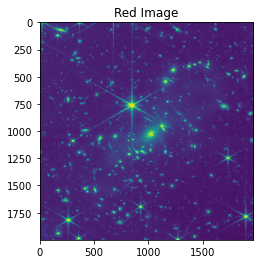

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


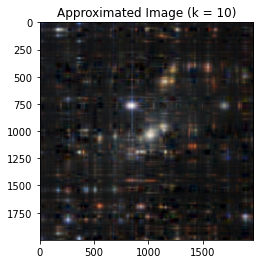

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


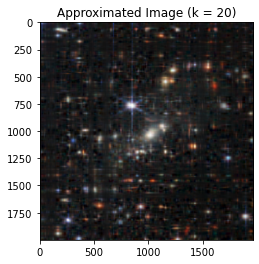

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


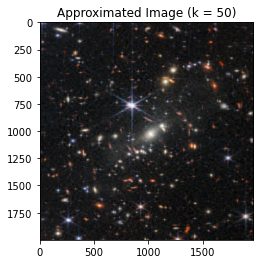

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


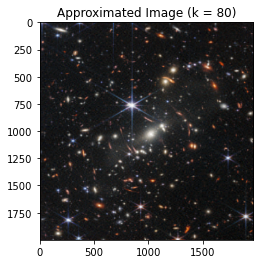

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


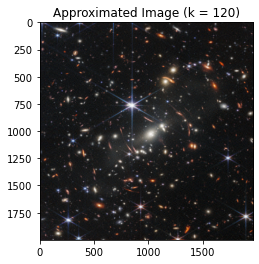

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


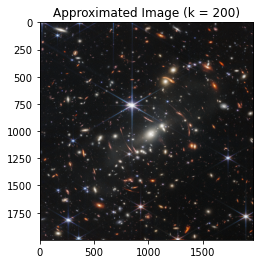

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


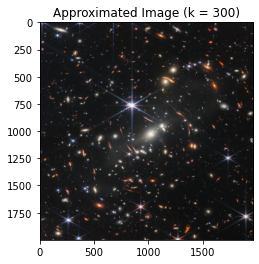

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


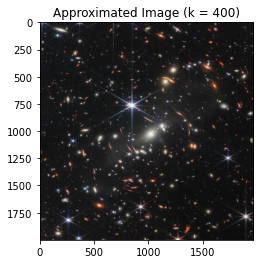

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


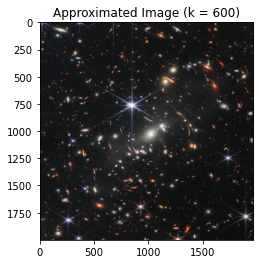

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


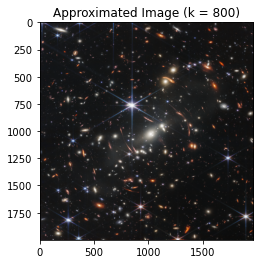

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


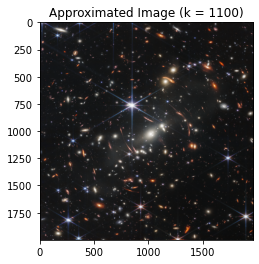

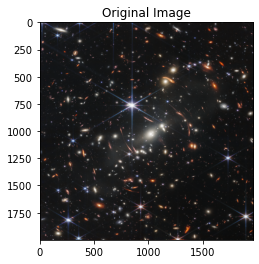

,k,sigma_next,two_norm,frob,frob_singular
0,10,36.232529,36.232529,173.481939,173.481939
1,20,25.299689,25.299689,142.534247,142.534247
2,50,13.603486,13.603486,98.019129,98.019129
3,80,9.027223,9.027223,76.352457,76.352457
4,120,6.066376,6.066376,60.072358,60.072358
5,200,3.592914,3.592914,42.690300,42.690300
6,300,2.291829,2.291829,31.386865,31.386865
7,400,1.660507,1.660507,24.540756,24.540756
8,600,1.024766,1.024766,16.003913,16.003913
9,800,0.684043,0.684043,10.601425,10.601425


In [13]:

import numpy as np
import skimage.io
from matplotlib import pyplot as plt
import pandas as pd

img = skimage.io.imread('Webb’s_First_Deep_Field.png') /255.0

red = img[:, :, 0]
green = img[:, : , 1]
blue = img[:, :, 2]
plt.figure()
plt.imshow(blue)
          
plt.title('Red Image')
plt.show()

u1, s1, v1 = np.linalg.svd(red, full_matrices = True)
u2, s2, v2 = np.linalg.svd(green, full_matrices = True)
u3, s3, v3 = np.linalg.svd(blue, full_matrices = True)

k_list = [10, 20, 50, 80, 120, 200, 300, 400, 600, 800, 1100]
sigma_list_red = []
two_norm_list = []
frob_norm_list = []
exp_frob_list = []

for k in k_list:
    #print(u1[:, :k].shape, np.diag(s1[:k]).shape, v1[:k, :].shape)
    A_apprx_red = np.matmul(u1[:, :k], np.matmul(np.diag(s1[:k]), v1[:k, :]))
    A_apprx_green = np.matmul(u2[:, :k],np.matmul(np.diag(s2[:k]), v2[:k, :]))
    A_apprx_blue = np.matmul(u3[:, :k], np.matmul(np.diag(s3[:k]), v3[:k, :]))
    
    A_apprx = np.stack([A_apprx_red, A_apprx_green, A_apprx_blue], axis = -1) 
    
    plt.figure()
    plt.imshow(A_apprx)
    plt.title('Approximated Image (k = {})'.format(k))
    plt.show()
    
    sigma_list_red.append(s1[k])
    two_norm_list.append(np.linalg.norm(red - A_apprx_red, ord = 2))
    frob_norm_list.append(np.linalg.norm(red - A_apprx_red, ord = 'fro'))
    
    temp = np.sqrt(np.sum(np.square(s1[k : ])))

    exp_frob_list.append(temp)
    
    

plt.figure()
plt.imshow(img)
plt.title('Original Image')
plt.show()

result = pd.DataFrame()
result['k'] = k_list
result['sigma_next'] = sigma_list_red
result['two_norm'] = two_norm_list
result['frob'] = frob_norm_list
result['frob_singular'] = exp_frob_list
result.to_excel('results_table.xlsx')

result
#red_blue = np.stack([red, blue], axis = -1)


In [12]:
import numpy as np
X = np.random.normal(size=[20,18])
P, D, Q = np.linalg.svd(X, full_matrices=False)
X_a = P @ np.diag(D) @ Q
print(np.std(X), np.std(X_a), np.std(X - X_a))
print('Is X close to X_a?', np.isclose(X, X_a).all())

0.998672475578092 0.9986724755780919 1.8755845197054042e-15
Is X close to X_a? True
